In [1]:
print('UbitName: aakashgu')
print('Person Number : 50289067')

UbitName: aakashgu
Person Number : 50289067


In [2]:
import cv2
from matplotlib import pyplot as plt

In [3]:
#reading in rgb format
airplane = cv2.imread('task1.png', cv2.IMREAD_COLOR)
airplane = cv2.cvtColor(airplane, cv2.COLOR_RGB2GRAY)

In [4]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', airplane)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
print(type(airplane))
print('Shape :',airplane.shape)
print('Size : ',airplane.size)

<class 'numpy.ndarray'>
Shape : (600, 900)
Size :  540000


In [34]:
print(airplane[0])

[209 209 209 209 212 209 209 209 216 209 209 212 209 209 212 209 212 209
 209 212 209 216 209 209 212 209 212 209 216 209 209 212 209 212 209 212
 209 212 209 212 209 212 209 212 217 209 212 209 217 212 209 212 209 217
 209 212 209 212 209 212 209 217 212 209 212 217 209 216 209 216 212 209
 216 212 209 212 209 216 212 209 216 209 216 209 216 209 216 209 216 209
 212 217 212 209 212 217 216 212 209 212 216 209 217 212 217 212 216 209
 216 212 209 216 216 209 216 212 217 212 216 209 217 216 212 217 212 217
 209 216 212 217 217 212 217 216 209 209 216 217 216 217 212 217 217 209
 217 212 217 216 217 209 217 212 217 216 212 217 217 216 217 217 216 216
 216 217 217 216 209 216 216 216 212 216 217 217 216 216 216 216 216 217
 216 216 217 217 216 216 216 216 216 217 212 217 217 216 209 217 217 216
 216 217 216 217 217 216 216 217 216 217 216 216 216 216 216 217 217 217
 216 217 216 217 217 217 216 216 216 217 216 217 216 217 217 217 217 217
 217 216 217 216 216 217 216 216 217 216 216 217 21

In [39]:
print(type(airplane))
print('Shape :',airplane.shape)
print('Rows :',airplane.shape[0])
print('Columns :',airplane.shape[1])
print('Size : ',airplane.size)
print(type(airplane[0][0]))

<class 'numpy.ndarray'>
Shape : (600, 900)
Rows : 600
Columns : 900
Size :  540000
<class 'numpy.uint8'>


In [40]:
img = list(airplane)
print(type(img))
print(len(img))
print(len(img[0]))

<class 'list'>
600
900


## Project1
    1)Edge Detection 
    2)Keypoint Detection
    3)Cursor Detection

### Edge detection -
    Write programs to detect edges in Fig. 1 (along both x and y directions) using Sobel operator. 
    
#### What is sobel operator?
    Sobel operator or sobel filter is used for edge detection in computer vision or image processing.

### Formulation
The operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical. If we define A as the source image, and Gx and Gy are two images which at each point contain the horizontal and vertical derivative approximations respectively, the computations are as follows:

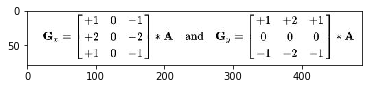

In [12]:
plt.imshow(cv2.imread('sobel_wiki.JPG', cv2.IMREAD_COLOR))
plt.show()

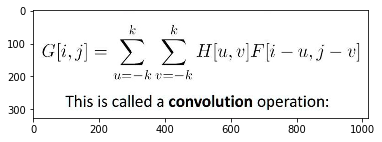

In [13]:
plt.imshow(cv2.imread('convolution_operation.JPG', cv2.IMREAD_COLOR))
plt.show()

In [41]:
sobel_x = [[1 , 0 , -1],[2 , 0 , -2],[1 , 0, -1]]


#testing array from http://www.songho.ca/dsp/convolution/convolution2d_example.html
#sobel_x = [[-1 , -2 , -1],[0 , 0 , 0],[1 , 2, 1]] 

print(sobel_x)
print(type(sobel_x))
print('Sobel Kernel Rows : ',len(sobel_x))
print('Sobel Kernal Columns :',len(sobel_x[0]))
#Where h is the matrix on which convolution is being applied that airplane picture and
# F is operation matrix. In this case it is sobel matrix

[[1, 0, -1], [2, 0, -2], [1, 0, -1]]
<class 'list'>
Sobel Kernel Rows :  3
Sobel Kernal Columns : 3


In [15]:
#img = [[1,2,3],[4,5,6],[7,8,9]]
#img = [[a,b,c],[d,e,f],[g,h,i]]
#img = np.array([[1,2,31,4,5],[6,0,81,9,10],[11,1,131,14,15],[16,17,181,19,20],[21,22,231,24,25]])
#img = [[0,81,9],[1,131,14],[17,181,19]]

u = len(img)#image rows
v = len(img[0])#image columns
len_k_row = len(sobel_x)
len_k_col = len(sobel_x[0])
print('row :',u,'\ncolumn :',v)

row : 600 
column : 900


In [16]:
print(sobel_x[0][0])
import numpy as np
#sobel_x_matrix = np.zeros_like(img)
#print(sobel_x_matrix)

1


In [24]:
offset = len(sobel_x)//2
sobel_matrix_list = []
row_list = []
sum_all = 0
import copy
for h_row in range(0,u):
    for h_column in range(0,v):
        sum_all = 0
        #print('New col')
        #print()
        row_list.append(sum_all)
        for k_row in range(0,len_k_row):
            k_row_flip = len_k_row -1 -k_row
            for k_column in range(0,len_k_col):
                k_col_flip = len_k_col -1 - k_column
                #to take care of kernel outside image index
                if (k_row_flip-h_row > offset or k_col_flip-h_column > offset or  h_row-k_row_flip+offset>=u or h_column-k_col_flip+offset >= v):
                    #print()
                    continue
                else:
                    #sobel_x_matrix[h_row][h_column] += sobel_x[k_row_flip][k_col_flip]*img[h_row-k_row_flip+offset][h_column-k_col_flip+offset]                     
                    row_list[len(row_list)-1]+= sobel_x[k_row_flip][k_col_flip]*img[h_row-k_row_flip+offset][h_column-k_col_flip+offset]
    sobel_matrix_list.append(copy.deepcopy(row_list))
    row_list.clear()
    #if sobel_x_matrix[h_row][h_column] <0 :
     #   print('-ve')
sobel_x_matrix = copy.deepcopy(np.asanyarray(sobel_matrix_list))
print(sobel_x_matrix)

[[ 634    3   -7 ...,    0    0 -741]
 [ 850   10  -14 ...,    0    0 -988]
 [ 843   14   -7 ...,    0    0 -988]
 ..., 
 [ 569    9   -6 ...,   21    5 -561]
 [ 595   -6  -20 ...,   24   33 -595]
 [ 460  -12  -22 ...,   17   26 -460]]


In [42]:
#print(sobel_x_matrix[0])
#print(sobel_matrix_list[0])

In [26]:
print(type(sobel_x_matrix))
print(len(sobel_matrix_list))
print(len(sobel_matrix_list[0]))

<class 'numpy.ndarray'>
600
900


In [31]:
# Eliminate zero values with method 1
pos_edge_x = (sobel_x_matrix - np.min(sobel_x_matrix)) / (np.max(sobel_x_matrix) - np.min(sobel_x_matrix))
cv2.namedWindow('pos_edge_x_dir', cv2.WINDOW_NORMAL)
cv2.imshow('pos_edge_x_dir', pos_edge_x)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
# Eliminate zero values with method 2
pos_edge_x = np.abs(sobel_x_matrix) / np.max(np.abs(sobel_x_matrix))
cv2.namedWindow('pos_edge_x_dir', cv2.WINDOW_NORMAL)
cv2.imshow('pos_edge_x_dir', pos_edge_x)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
sobel_y = [[1 , 2, 1],[0 , 0 , 0],[-1 , -2 , -1]] 

print(sobel_y)
print(type(sobel_y))
print('Sobel Kernel Rows : ',len(sobel_y))
print('Sobel Kernal Columns :',len(sobel_y[0]))
print(sobel_y[0][0])

offset = len(sobel_y)//2
sobel_y_matrix_list = []
row_list_sobel_y = []
sum_all = 0

for h_row in range(0,u):
    for h_column in range(0,v):
        sum_all = 0
        #print('New col')
        #print()
        row_list_sobel_y.append(sum_all)
        for k_row in range(0,len_k_row):
            k_row_flip = len_k_row -1 -k_row
            for k_column in range(0,len_k_col):
                k_col_flip = len_k_col -1 - k_column
                #to take care of kernel outside image index
                if (k_row_flip-h_row > offset or k_col_flip-h_column > offset or  h_row-k_row_flip+offset>=u or h_column-k_col_flip+offset >= v):
                    #print()
                    continue
                else:
                    #sobel_x_matrix[h_row][h_column] += sobel_x[k_row_flip][k_col_flip]*img[h_row-k_row_flip+offset][h_column-k_col_flip+offset]                     
                    row_list_sobel_y[len(row_list_sobel_y)-1]+= sobel_y[k_row_flip][k_col_flip]*img[h_row-k_row_flip+offset][h_column-k_col_flip+offset]
    sobel_y_matrix_list.append(copy.deepcopy(row_list_sobel_y))
    row_list_sobel_y.clear()
    #if sobel_x_matrix[h_row][h_column] <0 :
     #   print('-ve')
sobel_y_matrix = copy.deepcopy(np.asanyarray(sobel_y_matrix_list))
print(sobel_y_matrix)

[[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
<class 'list'>
Sobel Kernel Rows :  3
Sobel Kernal Columns : 3
1
[[ 634  853  849 ...,  988  988  741]
 [   6   10   14 ...,    0    0    0]
 [  -7  -14   -7 ...,    0    0    0]
 ..., 
 [  45   49   34 ...,   53   79   79]
 [  41   48   34 ...,   58   63   57]
 [-448 -596 -590 ..., -575 -594 -460]]


In [45]:
print(type(sobel_y_matrix))
print(len(sobel_y_matrix_list))
print(len(sobel_y_matrix_list[0]))

<class 'numpy.ndarray'>
600
900


In [49]:
# Eliminate zero values with method 1
pos_edge_y = (sobel_y_matrix - np.min(sobel_y_matrix)) / (np.max(sobel_y_matrix) - np.min(sobel_y_matrix))
cv2.namedWindow('pos_edge_y_dir', cv2.WINDOW_NORMAL)
cv2.imshow('pos_edge_y_dir', pos_edge_y)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Eliminate zero values with method 2
pos_edge_y = np.abs(sobel_y_matrix) / np.max(np.abs(sobel_y_matrix))
cv2.namedWindow('pos_edge_y_dir', cv2.WINDOW_NORMAL)
cv2.imshow('pos_edge_y_dir', pos_edge_y)
cv2.waitKey(0)
cv2.destroyAllWindows()

# magnitude of edges (conbining horizontal and vertical edges)
edge_magnitude = np.sqrt(sobel_x_matrix ** 2 + sobel_y_matrix ** 2)
edge_magnitude /= np.max(edge_magnitude)
cv2.namedWindow('edge_magnitude', cv2.WINDOW_NORMAL)
cv2.imshow('edge_magnitude', edge_magnitude)
cv2.waitKey(0)
cv2.destroyAllWindows()

edge_direction = np.arctan(sobel_y_matrix / (sobel_x_matrix + 1e-3))
edge_direction = edge_direction * 180. / np.pi
edge_direction /= np.max(edge_direction)
cv2.namedWindow('edge_direction', cv2.WINDOW_NORMAL)
cv2.imshow('edge_direction', edge_magnitude)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Original image size: {:4d} x {:4d}".format(len(img), len(img[1])))
print("Resulting image size: {:4d} x {:4d}".format(edge_magnitude.shape[0], edge_magnitude.shape[1]))

Original image size:  600 x  900
Resulting image size:  600 x  900
